# EDA for project

In [3]:
# importing libraries

# import numerical libraries
import numpy as np   

# import preprocessing imputer (to replace missing values)
from sklearn.preprocessing import Imputer

# to handle data in form of rows and columns 
import pandas as pd    

# import ploting libraries
import matplotlib.pyplot as plt   

# draw the charts here as part of the notebook 
%matplotlib inline

# import for statistical plots
import seaborn as sns

In [4]:
# data csv file contained in the same folder as the project
datafn = 'companiesProcessed.csv'

df = pd.read_csv(datafn, na_values = ['?'], header = None)

# check first five rows of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit
1,0.0,"3 Round Stones, Inc.",2010,Washington,DC,1-10,Private,Data/Technology,1,1,0,0,0,0
2,1.0,48 Factoring Inc.,2014,Philadelphia,PA,51-200,Private,Finance & Investment,1,0,0,0,0,0
3,2.0,5PSolutions,2007,Fairfax,VA,1-10,Private,Data/Technology,1,1,1,0,0,0
4,3.0,Accela,1999,San Ramon,CA,"501-1,000",Private,Governance,0,1,0,0,0,0


In [5]:
# setting the elements in the first row as column names
df.columns = df.iloc[0]

# dropping the first row since now we have the correct column names
df.drop(axis = 0, index = 0, inplace = True)

# dropping first column
df.drop(columns = np.nan, axis = 1, inplace = True)

df.head()

,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit
1,"3 Round Stones, Inc.",2010,Washington,DC,1-10,Private,Data/Technology,1,1,0,0,0,0
2,48 Factoring Inc.,2014,Philadelphia,PA,51-200,Private,Finance & Investment,1,0,0,0,0,0
3,5PSolutions,2007,Fairfax,VA,1-10,Private,Data/Technology,1,1,1,0,0,0
4,Accela,1999,San Ramon,CA,"501-1,000",Private,Governance,0,1,0,0,0,0
5,Accenture,1989,Chicago,IL,"10,001+",Public,Research & Consulting,1,0,0,0,0,0


In [9]:
for column in df.columns:
    print(column + ':\n')
    
    print(df[column].value_counts())
    print('\n\n\n')

company_name:

LOGIXDATA, LLC                  1
Nielsen                         1
FindTheBest.com                 1
Fastcase                        1
TagniFi                         1
SmartAsset                      1
Aidin                           1
Buildingeye                     1
MetLife                         1
LexisNexis                      1
Geolytics                       1
Smart Utility Systems           1
Inovalon                        1
PEV4me.com                      1
JJ Keller                       1
Retroficiency                   1
Social Health Insights          1
Credit Sesame                   1
United Mayflower                1
FlightStats                     1
eInstitutional                  1
karmadata                       1
Personal, Inc.                  1
Plus-U                          1
Copyright Clearance Center      1
Reed Elsevier                   1
Persint                         1
BetterLesson                    1
The DocGraph Journal            1

In [45]:
df.info()

# all columns are object types, some should be int type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 1 to 441
Data columns (total 13 columns):
company_name        441 non-null object
year_founded        441 non-null object
city                441 non-null object
state               441 non-null object
size                441 non-null object
company_type        441 non-null object
company_category    441 non-null object
b2b                 441 non-null int64
b2c                 441 non-null int64
b2g                 441 non-null int64
b2n                 441 non-null int64
academia            441 non-null int64
nonprofit           441 non-null int64
dtypes: int64(6), object(7)
memory usage: 68.2+ KB


s = pd.Series([1, np.nan])

s = s.astype(object)
i = s.notnull()
s[i] = s[i].astype(int)

type(s[0])

In [46]:
# converting columns into int types
df['b2b'] = df['b2b'].astype(int)
df['b2c'] = df['b2c'].astype(int)
df['b2g'] = df['b2g'].astype(int)
df['b2n'] = df['b2n'].astype(int)
df['academia'] = df['academia'].astype(int)
df['nonprofit'] = df['nonprofit'].astype(int)


In [47]:
# now we have int columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 1 to 441
Data columns (total 13 columns):
company_name        441 non-null object
year_founded        441 non-null object
city                441 non-null object
state               441 non-null object
size                441 non-null object
company_type        441 non-null object
company_category    441 non-null object
b2b                 441 non-null int64
b2c                 441 non-null int64
b2g                 441 non-null int64
b2n                 441 non-null int64
academia            441 non-null int64
nonprofit           441 non-null int64
dtypes: int64(6), object(7)
memory usage: 68.2+ KB


In [44]:
# now we can find the sum for each column and then plot them into a histogram
b2b = df['b2b'].sum()
b2c = df['b2c'].sum()
b2g = df['b2g'].sum()
b2n = df['b2n'].sum()
academia = df['academia'].sum()
nonprofit = df['nonprofit'].sum()

b2b

302

In [64]:
# initializing list with all business models
business_model = pd.Series([b2b, b2c, b2g, b2n, academia, nonprofit], index = ['b2b', 'b2c', 'b2g', 'b2n', 'academia', 'nonprofit'])

business_model


b2b          302
b2c          203
b2g           87
b2n            1
academia      11
nonprofit     18
dtype: int64

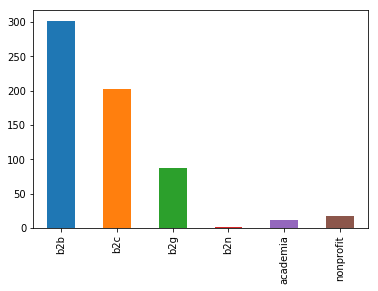

In [63]:
# business model bar plot
business_model.plot(kind = 'bar');

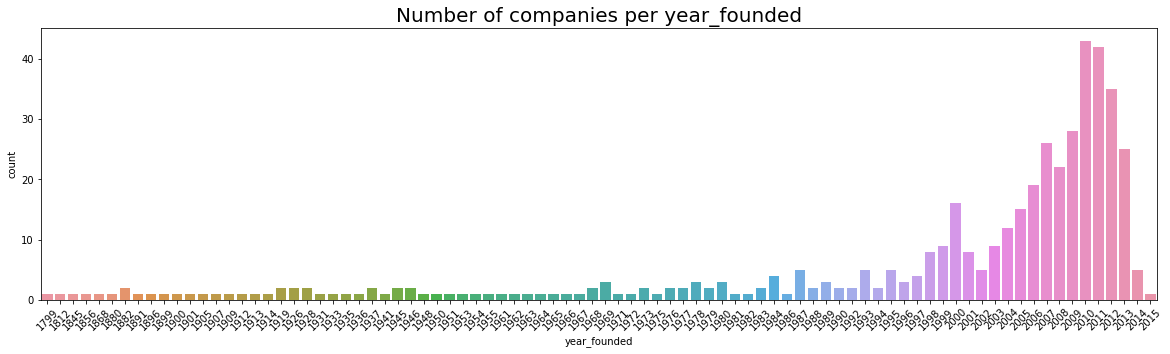

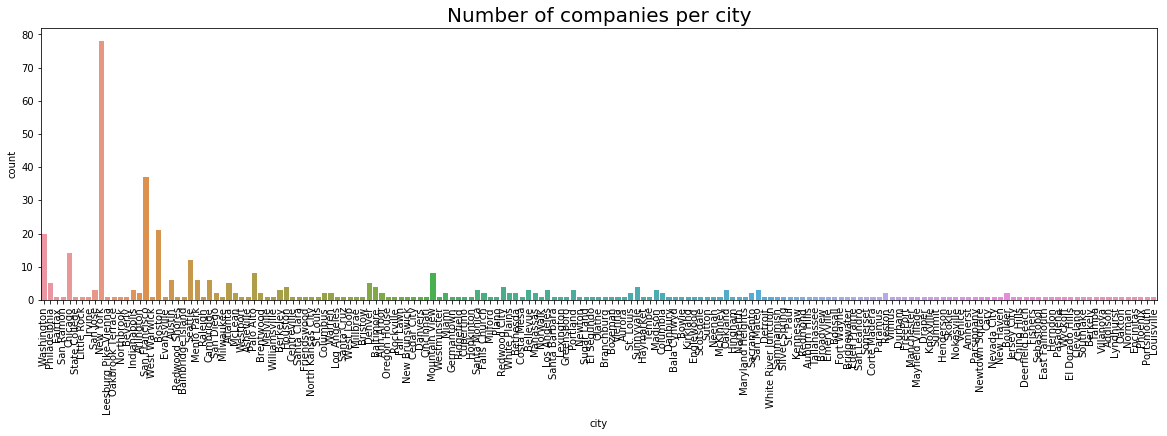

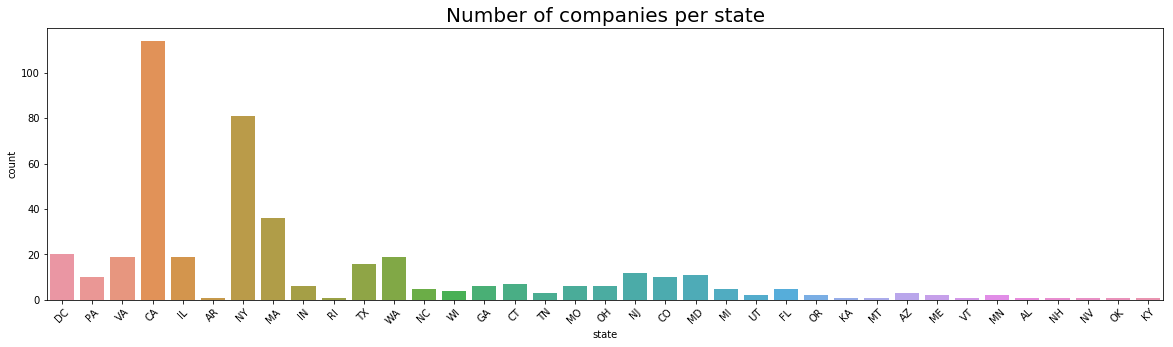

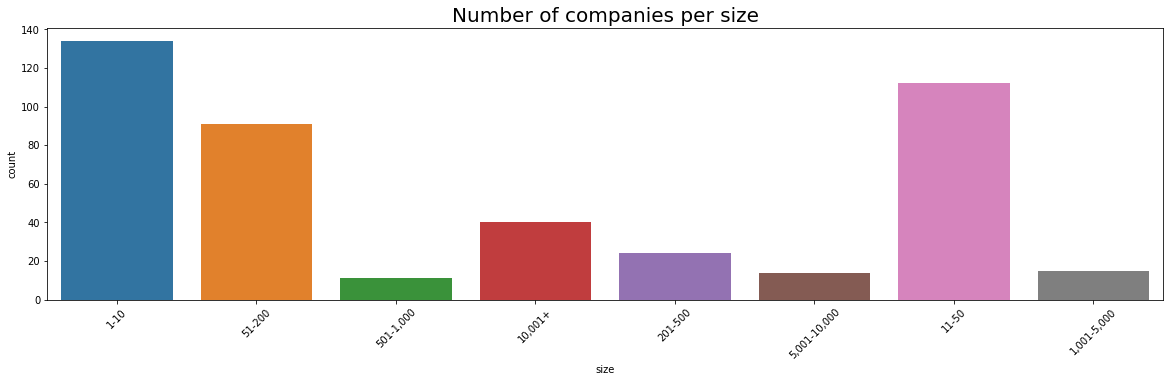

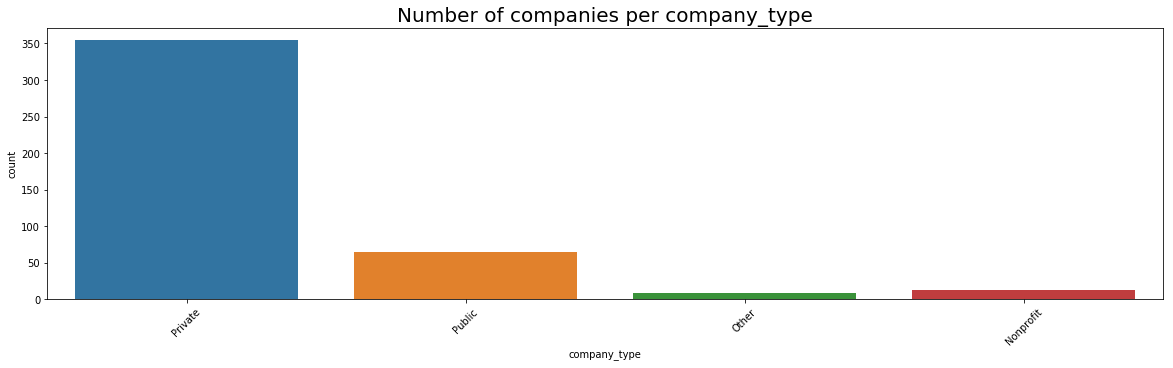

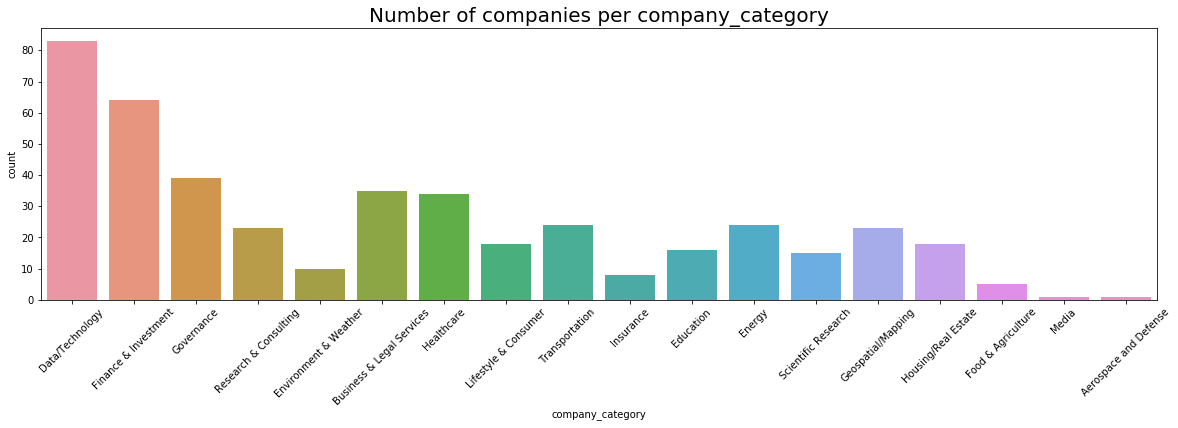

In [65]:
plotCompanies = ['year_founded', 'city', 'state', 'size', 'company_type', 'company_category']
for column in plotCompanies:
    plt.figure(figsize=(20, 5))

    # count how many vehicles were sold per manufacturer (use original dataframe since df2 is all numbers)
    sns.countplot(x=df[column], data=df)
    rotation = 45
    if (column == 'city'):
        rotation = 90
    plt.xticks(rotation=rotation)

    plt.title('Number of companies per ' + column, fontsize = 20)
    plt.show()